# Check when JRA55-do v1.5.0.1 changes from preliminary to final

Run with 14 cores.

See https://climate.mri-jma.go.jp/pub/ocean/JRA55-do/

In [1]:
import xarray as xr
import glob
import matplotlib.pyplot as plt

In [17]:
def checkvars(ftuple):
    # dask makes it slower on 14 cores - don't bother
    # dss = [ xr.open_dataset(fn, decode_times=True, engine='netcdf4', chunks='auto') for fn in ftuple ]
    dss = [ xr.open_dataset(fn, decode_times=True, engine='netcdf4') for fn in ftuple ]
    vs = [ list(ds.keys()) for ds in dss ]
    vs_uniq = { v for sublist in vs for v in sublist }
    fieldnames = { k for ds in dss for k in list(ds.keys()) if len(ds[k].shape) == 3 }
    if len(fieldnames) != 1:
        print('Mismatched fields!')
    fieldname = list(fieldnames)[0]
    fields = [ ds[fieldname] for ds in dss ]
    print(fieldname, end='')
    fielddiffs = [ abs((f - fields[0])) for f in fields[1:] ]
    maxdiffs = [ f.max(dim=['lat','lon'], keep_attrs=True) for f in fielddiffs ]
    for ts in maxdiffs:
        ts_nonzero = (ts != 0.0).compute()
        ts_nonzero_times = ts.where(ts_nonzero, drop=True).time.values
        if len(ts_nonzero_times) > 0:
            print(' first differs at', repr(ts_nonzero_times[0]).split("'")[1])
            print(ftuple)
        else:
            print(' identical')
        plt.figure()
        ts.plot()
        plt.title(fieldname+ ' max absolute difference')
    return maxdiffs

In [18]:
files = [ # check for https://github.com/COSIMA/JRA55-do-1-5-0-1/issues/1
    glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*1231*.nc'),
    glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror-2024-03-14//*/*/*/*/latest/*1231*.nc')
]
# files = [
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20231215*.nc'),
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20231216*.nc')
# ]
# files = [
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20231029*.nc'),
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20231030*.nc')
# ]
# files = [
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20231019*.nc'),
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20231029*.nc')
# ]
# files = [
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20230928*.nc'),
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20231005*.nc')
# ]
# files = [
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20230901*.nc'),
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20230902*.nc')
# ]
# files = [
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20230803*.nc'),
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20230804*.nc')
# ]
# files = [
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20230710*.nc'),
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/*20230713*.nc')
# ]
# files = [
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/tas*20230710*.nc'),
#     glob.glob('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/*/*/*/*/latest/tas*20230713*.nc')
# ]
if len(set([len(f) for f in files])) > 1:
    print('Number of files differs!')
for f in files:
    f.sort()

files = zip(*files)

prra identical
prra identical
prra identical
prsn identical
prsn identical
prsn identical
rlds identical
rlds identical
rlds identical
rsds identical
rsds identical
rsds identical
huss identical
huss identical
huss first differs at 2023-12-10T15:00:00.000000000
('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/atmos/3hrPt/huss/gr/latest/huss_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-5-0-1_gr_202301010000-202312312100.nc', '/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror-2024-03-14/atmos/3hrPt/huss/gr/latest/huss_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-5-0-1_gr_202301010000-202312312100.nc')
psl identical
psl identical
psl identical
tas identical
tas identical
tas first differs at 2023-12-10T15:00:00.000000000
('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/atmos/3hrPt/tas/gr/latest/tas_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-5-0-1_gr_202301010000-202312312100.nc', '/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror-2024-03-14/atmos/3hrPt/tas/gr/latest/t

/jobfs/113462048.gadi-pbs/ipykernel_1075371/3407988559.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


ts identical
ts identical
ts identical
uas identical
uas identical
uas first differs at 2023-12-10T15:00:00.000000000
('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/atmos/3hrPt/uas/gr/latest/uas_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-5-0-1_gr_202301010000-202312312100.nc', '/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror-2024-03-14/atmos/3hrPt/uas/gr/latest/uas_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-5-0-1_gr_202301010000-202312312100.nc')
vas identical
vas identical
vas first differs at 2023-12-10T15:00:00.000000000
('/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror/atmos/3hrPt/vas/gr/latest/vas_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-5-0-1_gr_202301010000-202312312100.nc', '/g/data/ik11/inputs/JRA-55/JRA55-do-1-5-0-1/mirror-2024-03-14/atmos/3hrPt/vas/gr/latest/vas_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-5-0-1_gr_202301010000-202312312100.nc')
friver identical
friver identical
friver identical
licalvf identical
licalvf identical
licalvf iden

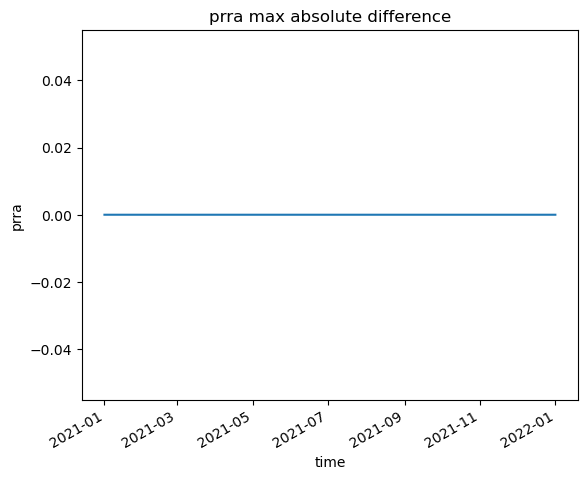

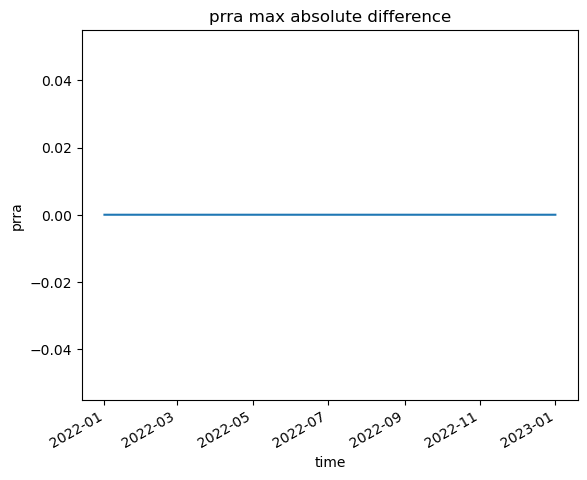

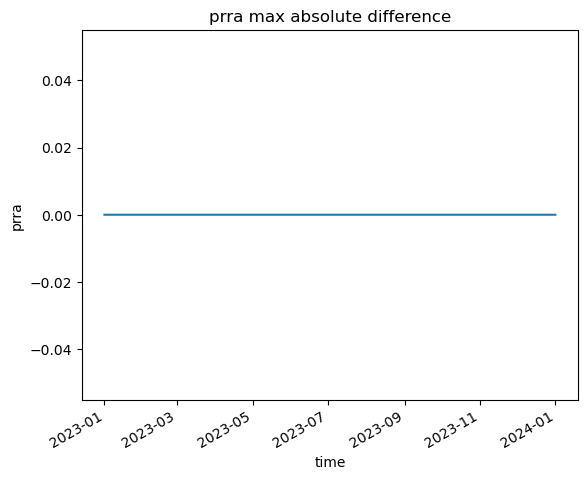

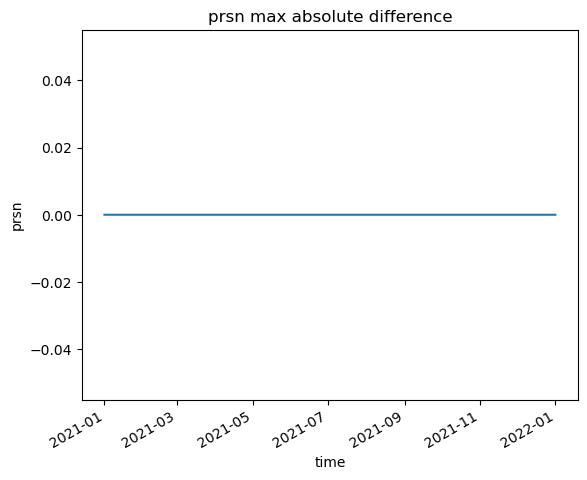

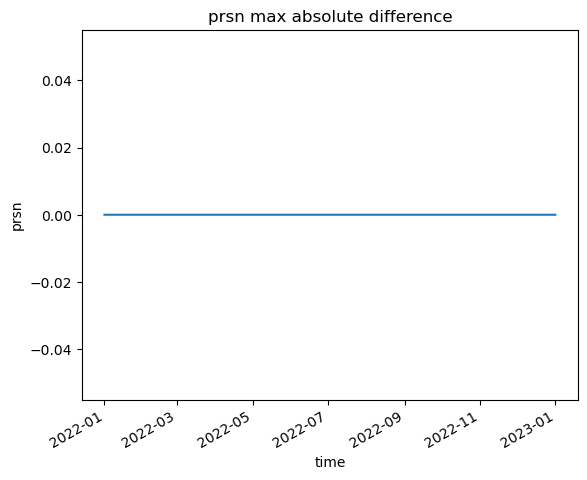

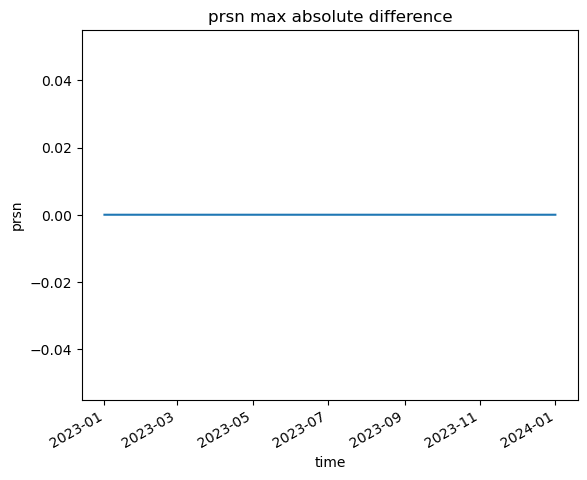

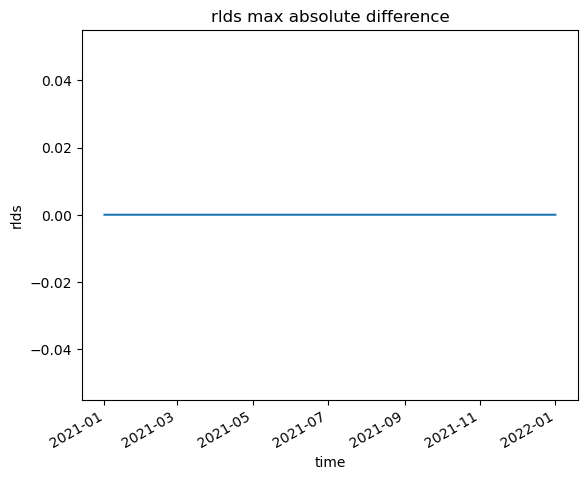

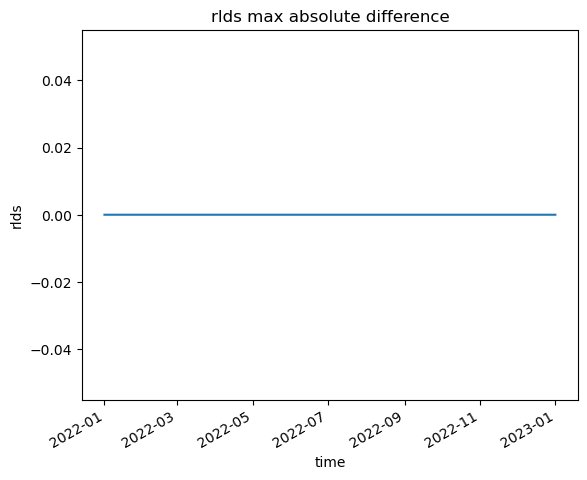

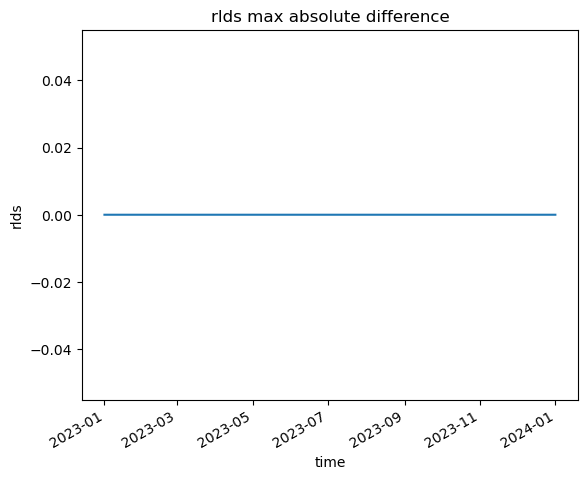

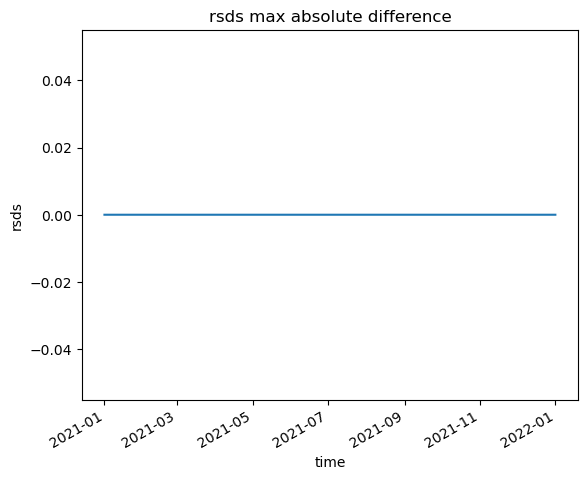

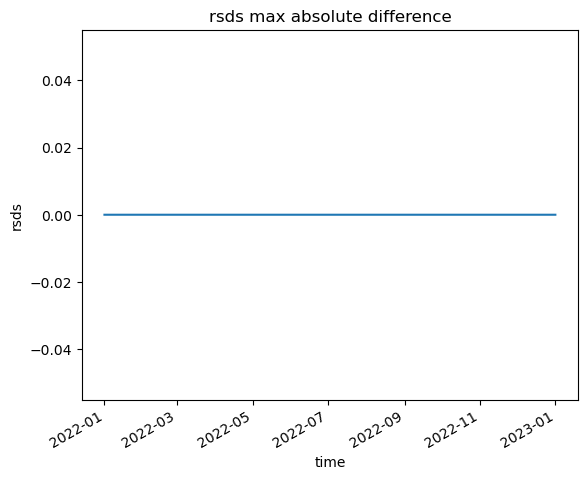

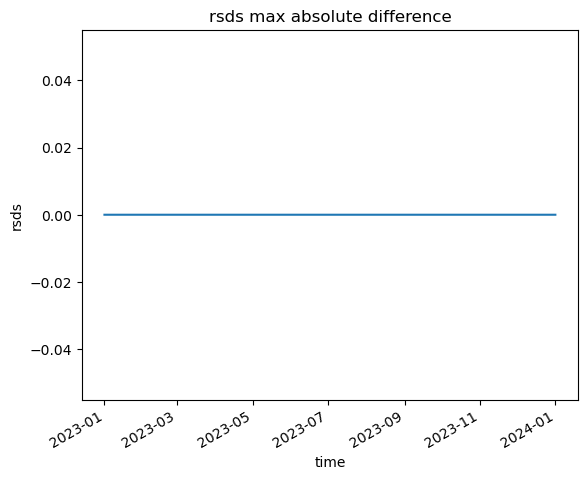

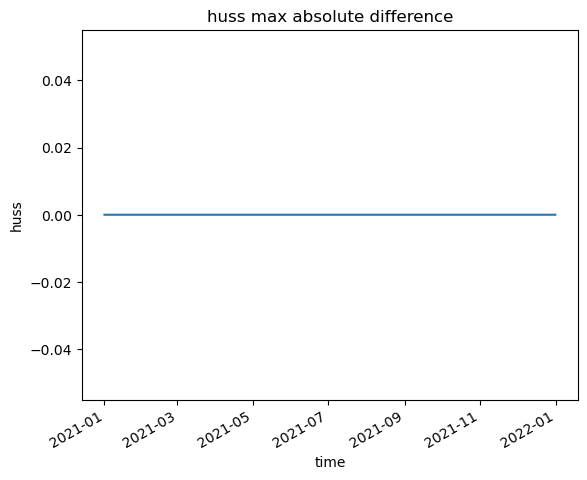

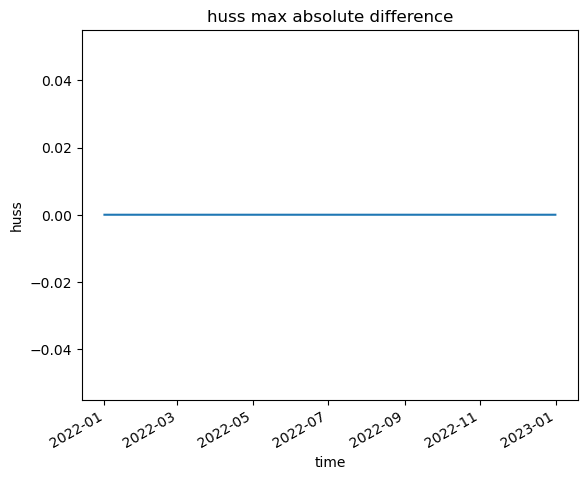

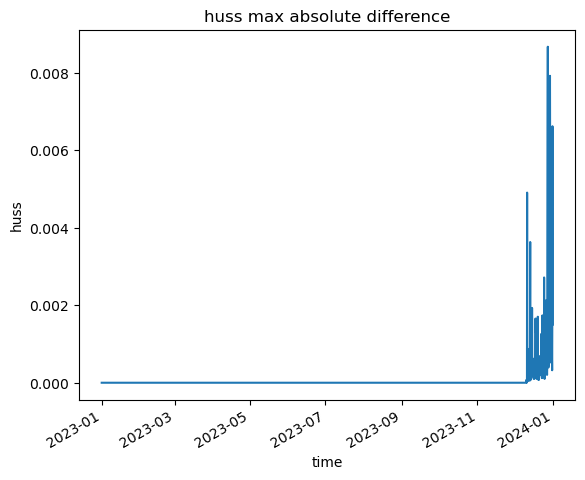

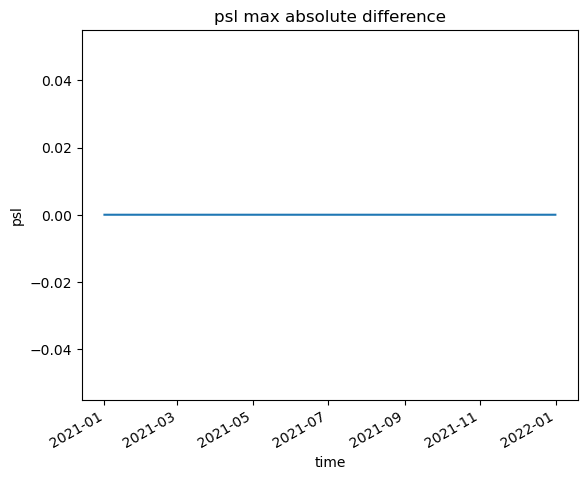

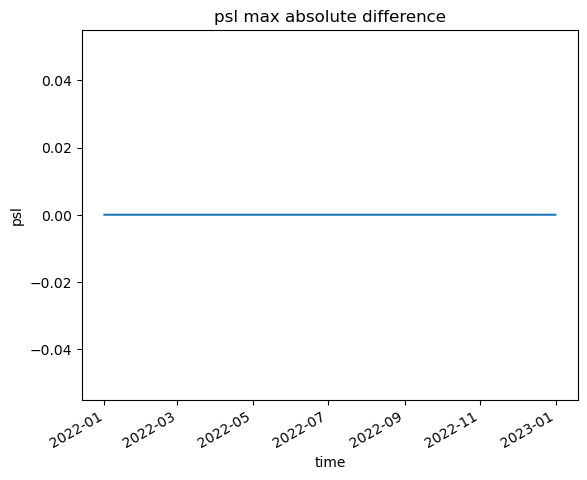

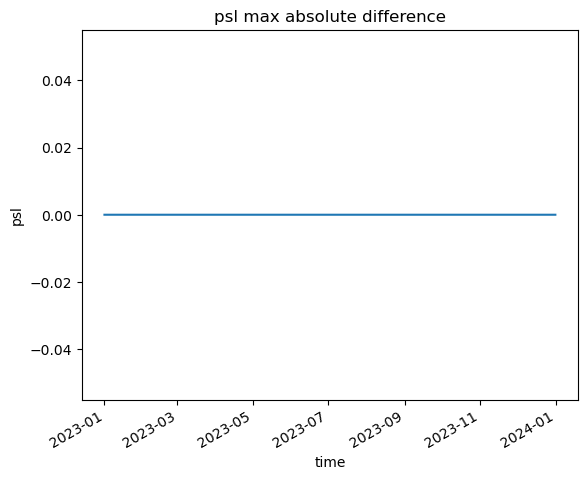

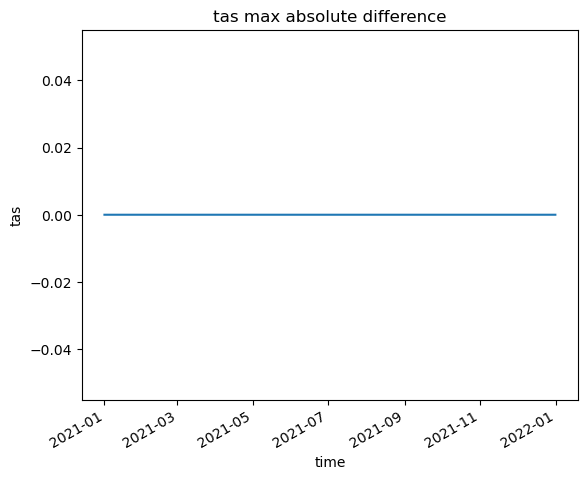

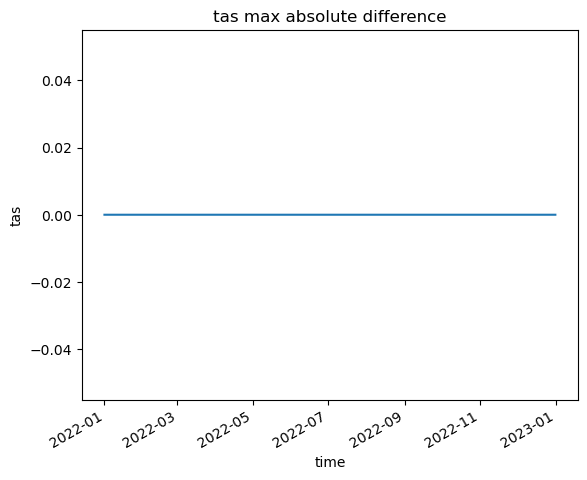

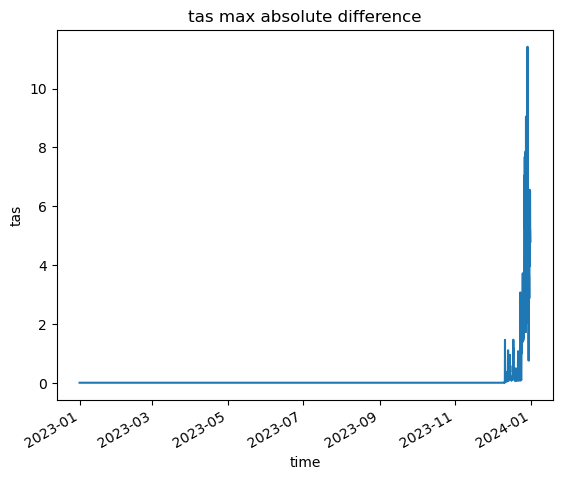

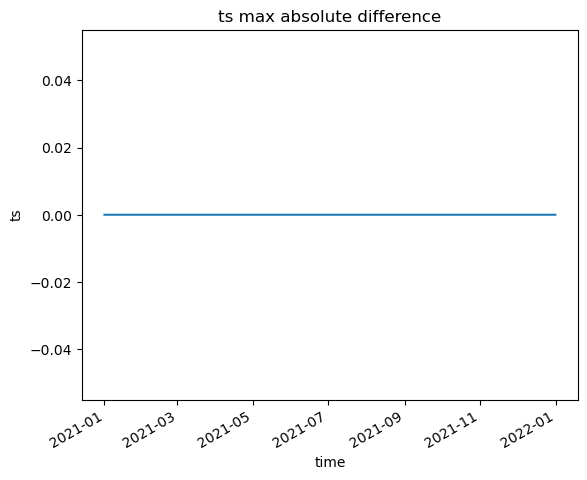

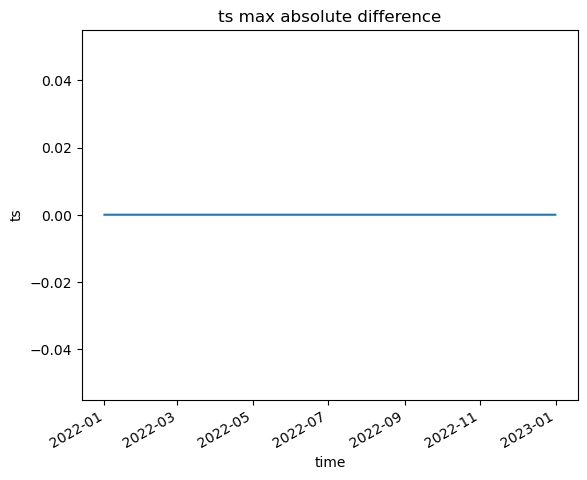

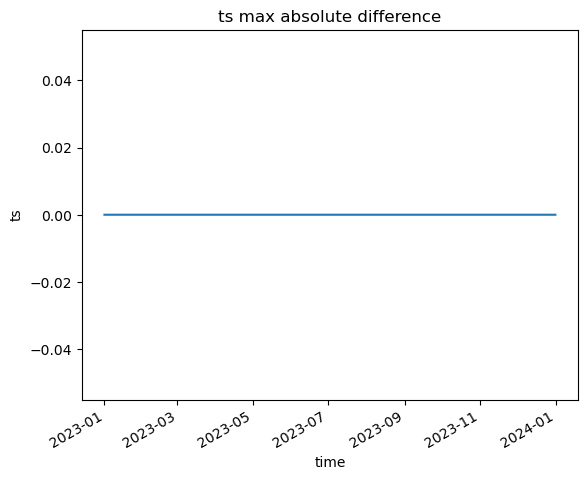

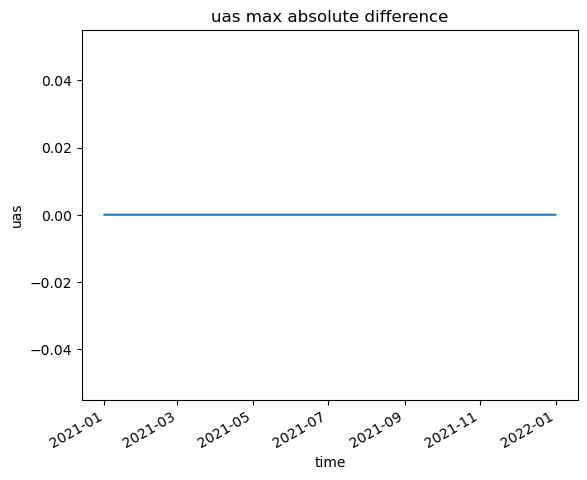

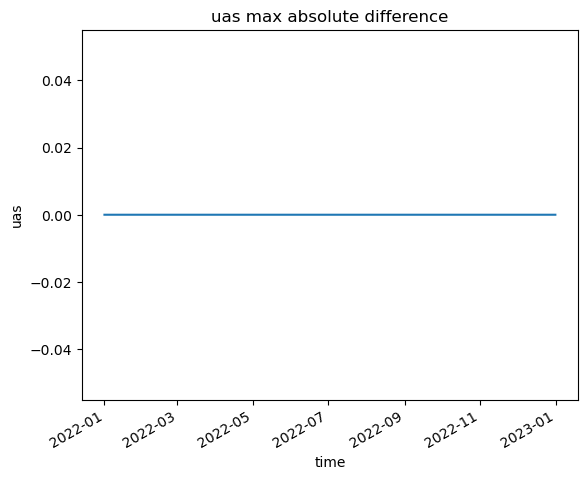

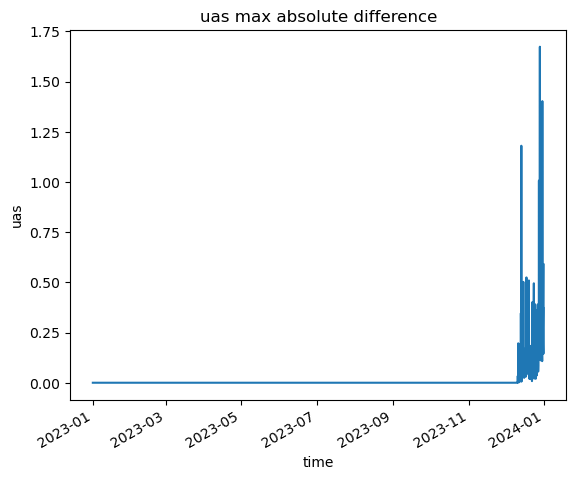

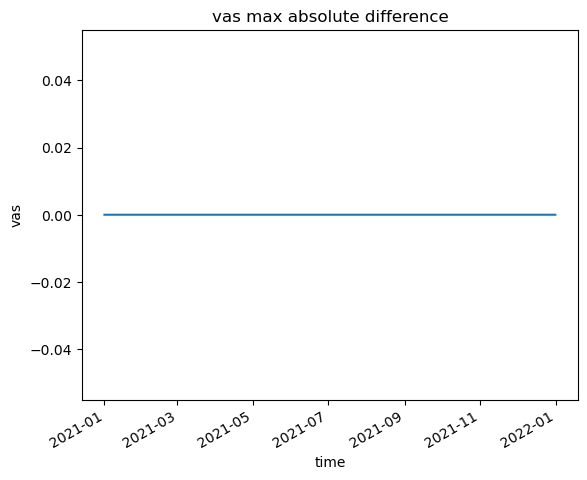

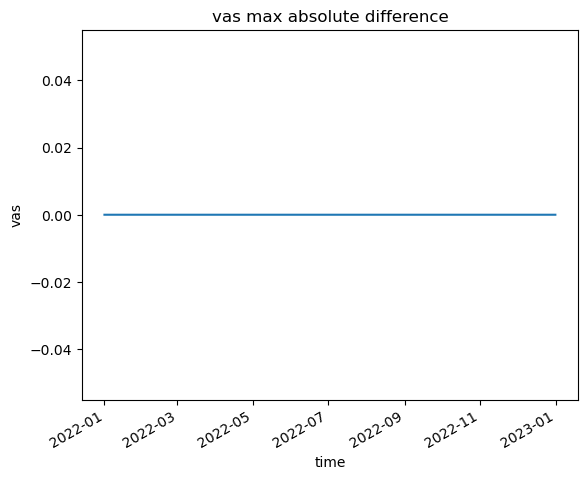

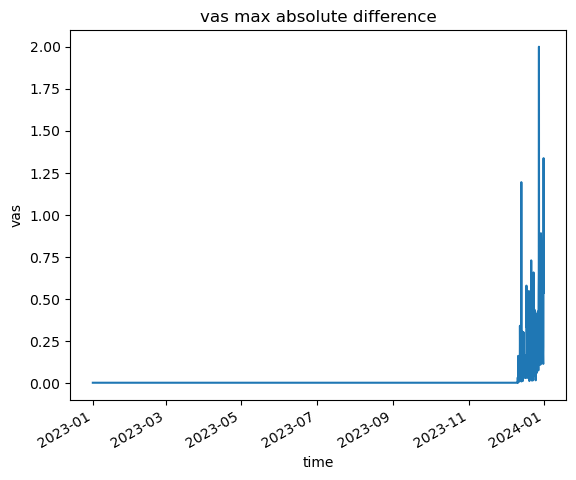

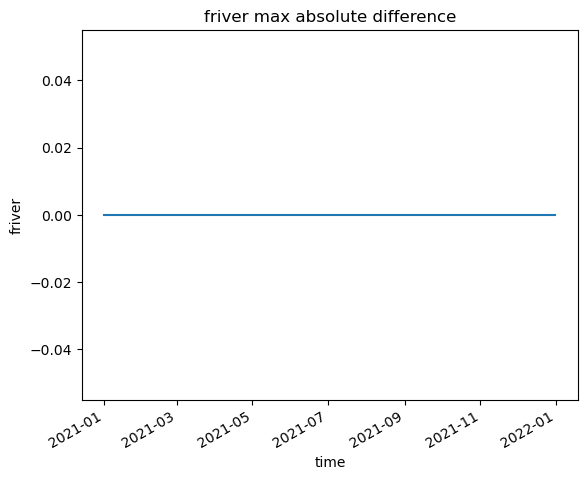

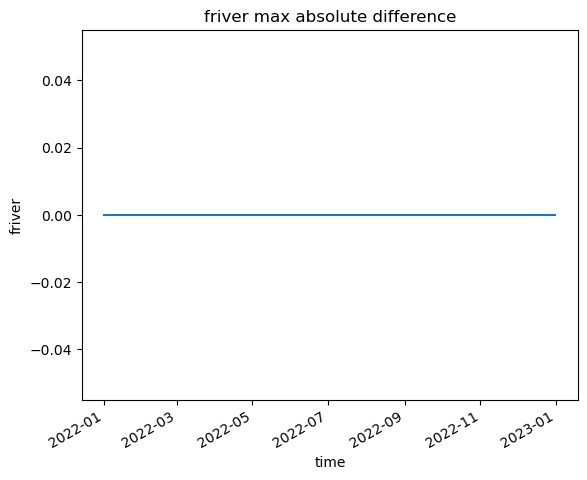

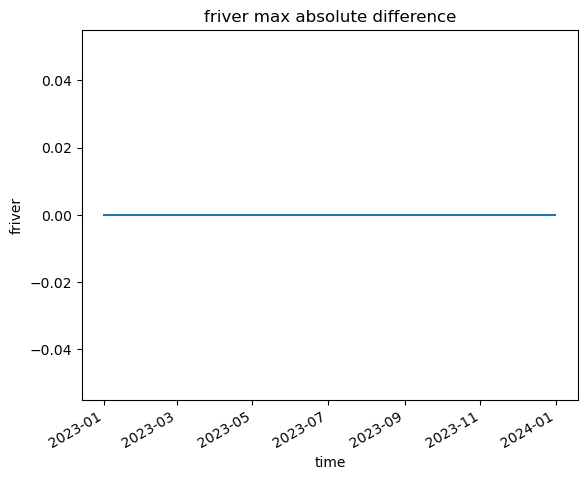

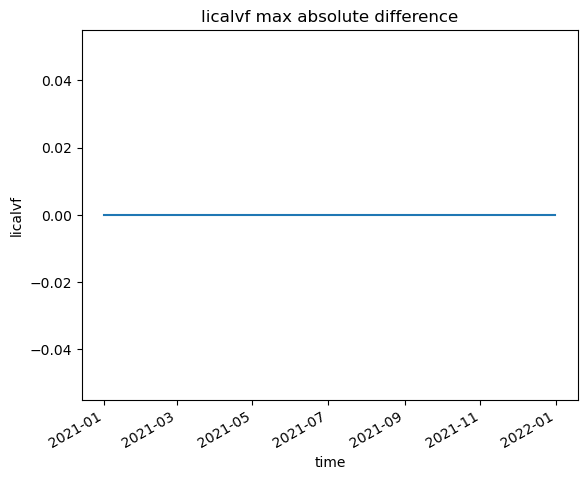

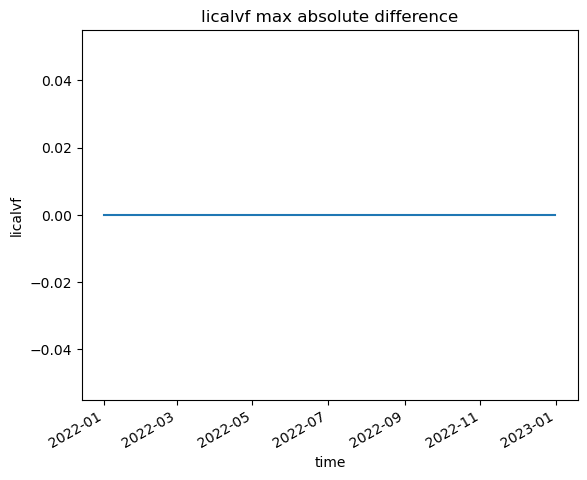

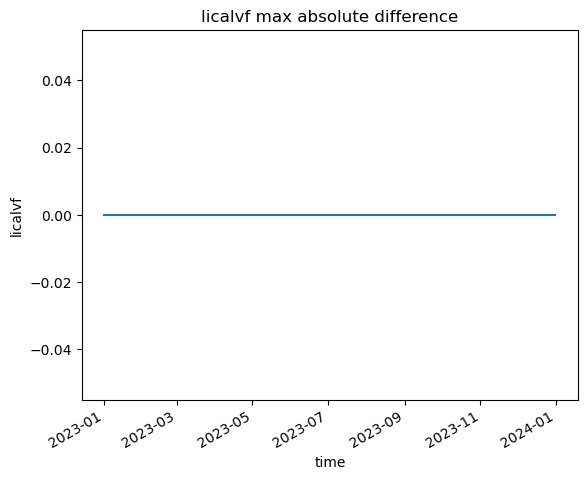

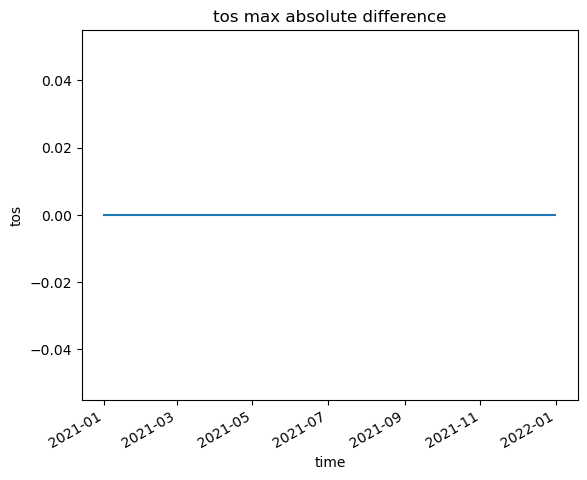

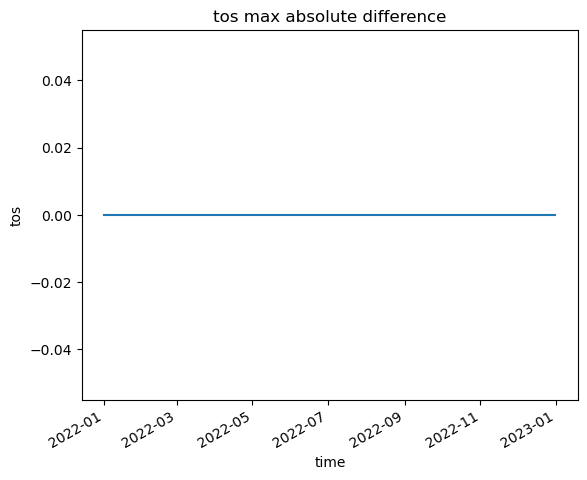

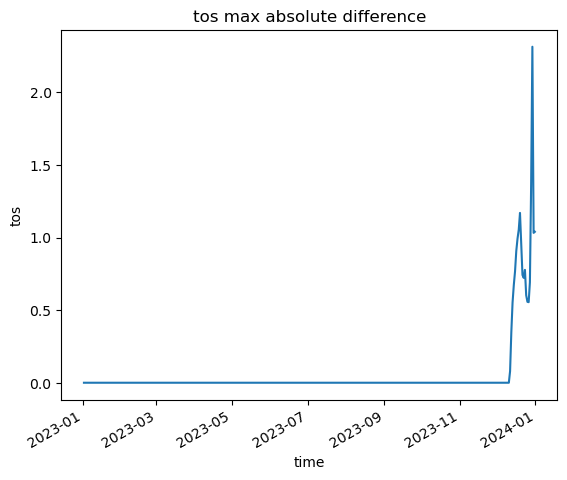

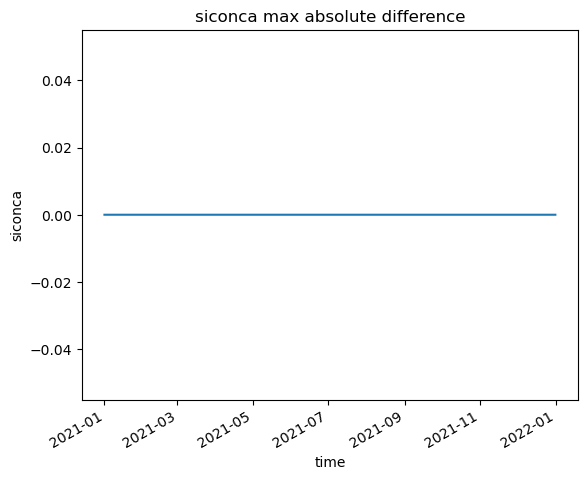

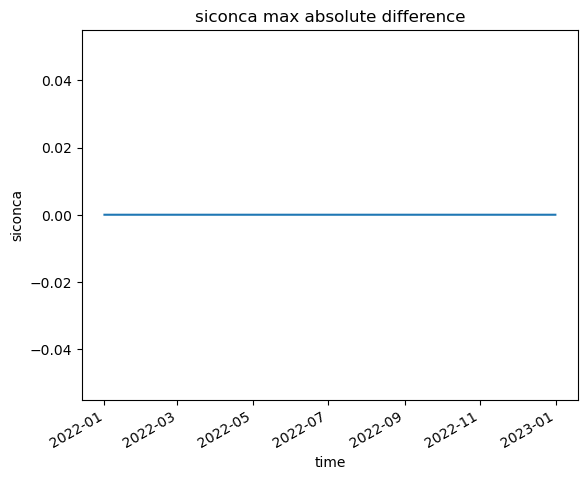

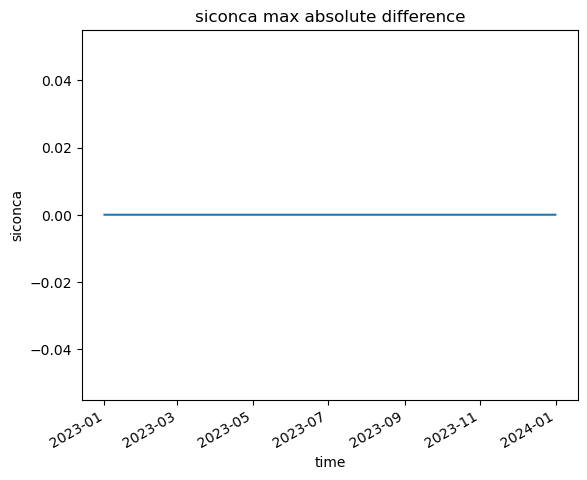

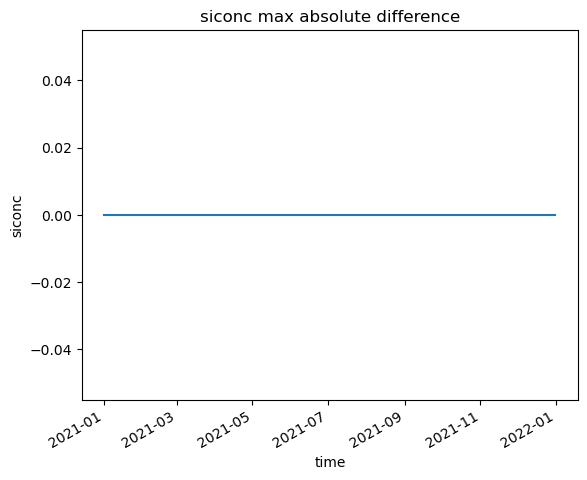

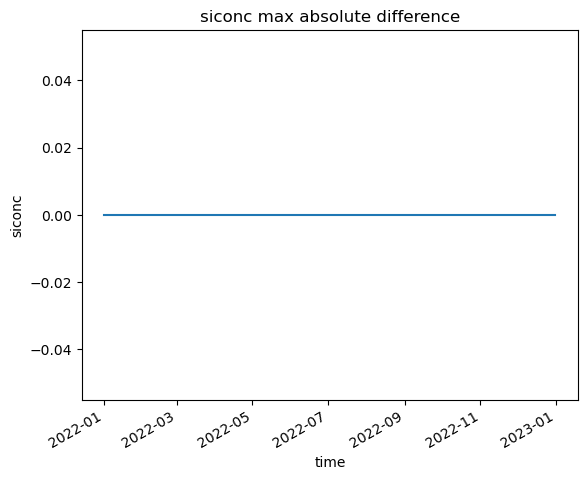

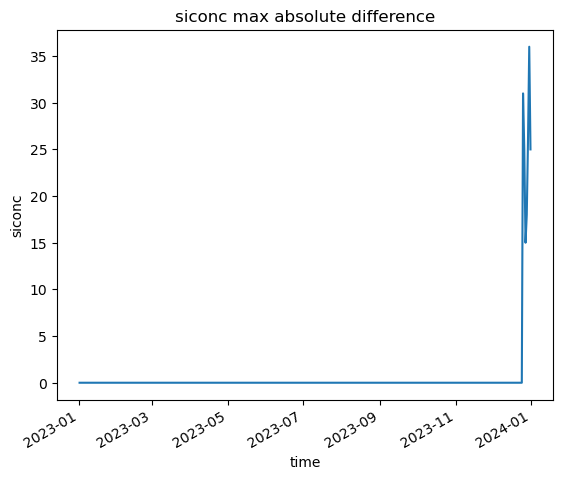

In [19]:
%%time
for ftuple in files:
    maxdiffs = checkvars(ftuple)